<h1><center>Discrete Curves</center></h1>


<h3><center>by Abhijith Atreya & Jax Burd</center></h3>

<center>UCSB ECE 194N/594N</center>

<center>Nina Miolane</center>



-------------------------------------------------------------------------------------------------------------------------------



## Introduction

### Definition of Curves: The result of an interval to a topological space by a continuous function

- **Continous Curves**: Differentiable at every point along the curve, containing an infinite amount of points


- **Discrete Curves**: Non-Differentiable at every point, containing a finite amount of points sampled from the continous curve it estimates


- **Mathematical Field**: Differential Geometry

![](images/Manifold_Figure.JPG)


## Real-World Applications of Discrete Curves
- *To define shape of objects and shape analysis*


- *To define elastic metrics that quantifies the bending and stretching needed to deform shapes*
    
        -  Elastic Metric: quantifies the bending and stretching needed to deform shapes into eachother

- In biomedical image analysis, to evaluate shapes of cells


- Structural analysis of cylindrical helices to study protein structure deformation 


- 3D face representation and recognition 


- Landscpae topology representation and analysis 

![](images/Elastic_Figure.JPG)

## Mathematical Background 

A discrete curve is an ordered sequence of points in $R^{N}$, defined as :

$\gamma : I = (0,1,... n-1) \rightarrow R^{N}$

where the set of edges are :

$v  : E \rightarrow R^{3} ,    v_{i,j+1} := \gamma _{i+1} - \gamma _{i} $

-------------------------------------------------------------------------------------------------------------------------------

The length of a **geodesic** between two curves can be defined as :

$ d_{c}(q_0,q_1) = inf_{\alpha:[0,1] \rightarrow C | \alpha(0)=q0,α(1)=q1} L[\alpha]$



The Fisher-Rao **elastic metric** on a curve can be defined as :

$\langle u_1, u_2\rangle = \int_{D} u_1(t) u_2(t) e^{\phi(t)}$

-------------------------------------------------------------------------------------------------------------------------------


## Visualizations

Examples of the built in functions for our class of Discrete Curves




In [1]:
from discrete_curve import DiscreteCurveViz
import numpy as np
from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.discrete_curves import DiscreteCurves

INFO: Using numpy backend


## Visualization of Discrete Curves in $R^{3}$

3- Dimensional discrete curves are created by obtained by sampling a parameterized equation which describes the curve.
    Here, we use the following equations in $R^{3}$ to describe the curve in 3-D:

Curve 1:

$x^{'} =  4 + cos(\pi x)$

$y^{'} = 1 + sin(\pi  y)$

$z^{'} = 0$




Curve 2:

$x^{'} = 0$

$y^{'} = 5 + cos(\pi  x)$


$z^{'} = 1 + sin(\pi  x) $



In [2]:
#Parameterizing the discrete curve
r3 = Euclidean(dim=3)
curves_r3 = DiscreteCurves(ambient_manifold=r3)

parametrized_curve_a = lambda x: np.transpose(
     np.array([ 4 + 1 * np.cos(np.pi * x),1 + 1 * np.sin(np.pi * x), 0*x])

)
parametrized_curve_b = lambda x: np.transpose(
     np.array([  0*x, 5 + 1 * np.cos(np.pi * x),1 + 1 * np.sin(np.pi * x)])
)

 We get a discrete curve by generating 20 samples along the curves, with $ x  \epsilon  [ 0, 1 ]$

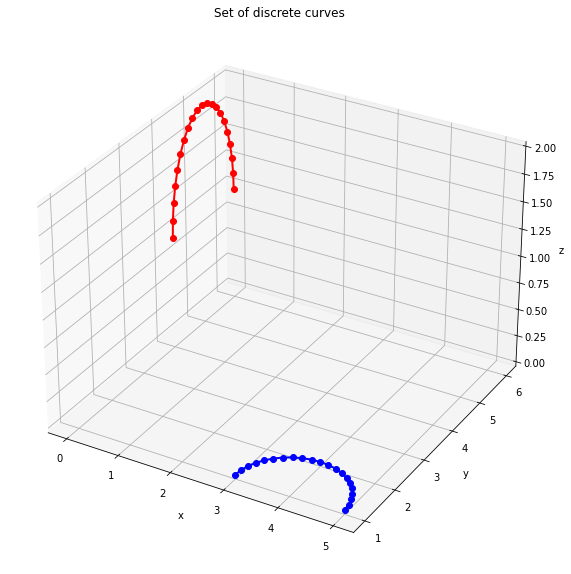

In [3]:
#Generating the discrete curve
n_sampling_points = 20
sampling_points = np.linspace(0.0, 1, n_sampling_points + 1)

dc_viz1 = DiscreteCurveViz(curves_r3, [parametrized_curve_a,parametrized_curve_b], [sampling_points,sampling_points])

# Plot the two curves
linestyles = ['o-b', 'o-r']
labels = ['x','y','z']
title = 'Set of discrete curves'
dc_viz1.plot_3Dcurves(linestyles, labels, title)

## Square root veocity (SRV) metric 
To calculate the distance between the curves, SRV metric is used.

The Square Root Velocity (SRV) metric computes the distance between the velocities of the curves.

It is computed as : 

For a parameterized curve $\beta$ :


$\beta : D \rightarrow R^{3} $,

where D is the domain for parameterization

The SRV function q is defined as:

$q : D \rightarrow R^{3} $


$ q(t) = F(\beta \dot (t)) = \frac{\beta \dot (t)}{\sqrt (\vert \vert \beta \dot \vert \vert)}$

with the restriction of : 
$\int_{D}\vert \vert q(t) \vert \vert^{2} dt = 2\pi$

This resrtiction rescales all the curves to be of length $2 \pi$ and makes them scale invariant

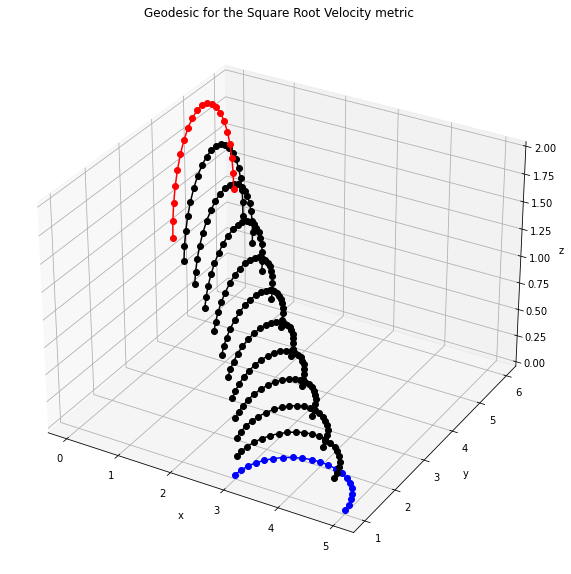

<Figure size 720x720 with 0 Axes>

In [4]:
n_times = 12 # number of intermediate geodesic curves
index_a = 0  # index of curve A
index_b = 1  # index of curve B

linestyles = ['o-b', 'o-k','o-r']
axis_labels = ['x','y','z']
title = "Geodesic for the Square Root Velocity metric"

dc_viz1.plot_geodesic(n_times, index_a, index_b, linestyles, axis_labels, title)

In [5]:
#Distance between the 2 curves using SRV metric
original_curve_a = dc_viz1.curve_points[0]
original_curve_b = dc_viz1.curve_points[1]

curves_r3.square_root_velocity_metric.dist(original_curve_a, original_curve_b)

2.4449613217755948

#### Now, let us reparameterize both the curves by using $x^{''} = x^{'  3}$

In [6]:
#Geodesics when both curves are reparameterized in the same way
original_sampling_points = dc_viz1.sampling_points

new_sampling_points = sampling_points**3

dc_viz2 = DiscreteCurveViz(curves_r3, [parametrized_curve_a,parametrized_curve_b], [new_sampling_points,new_sampling_points])
resampled_curve_a = dc_viz2.curve_points[0]
resampled_curve_b = dc_viz2.curve_points[1]

curves_r3.square_root_velocity_metric.dist(resampled_curve_a, resampled_curve_b)

2.438509852949066

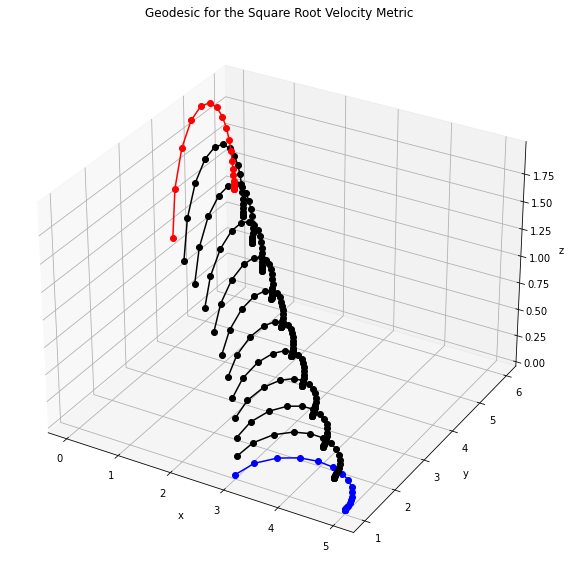

<Figure size 720x720 with 0 Axes>

In [7]:
title = "Geodesic for the Square Root Velocity Metric"
dc_viz2.plot_geodesic(n_times, index_a, index_b, linestyles, axis_labels, title)


#### Now, let us reparameterize only one of the curves with $x^{''} = x^{'  3}$

In [8]:
# Geodesics when curves are resmpled in different ways
curves_r3.square_root_velocity_metric.dist(original_curve_a, resampled_curve_b)


2.0244048415335465

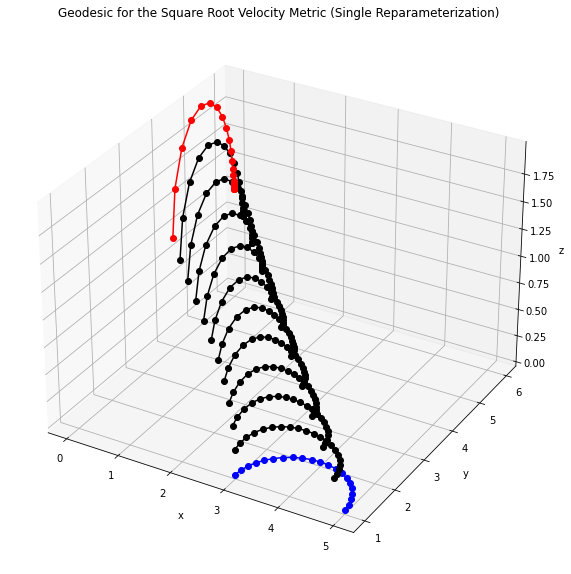

<Figure size 720x720 with 0 Axes>

In [9]:
dc_viz3 = DiscreteCurveViz(curves_r3, [parametrized_curve_a,parametrized_curve_b], [sampling_points,new_sampling_points])
title = "Geodesic for the Square Root Velocity Metric (Single Reparameterization)"

dc_viz3.plot_geodesic(n_times, index_a, index_b, linestyles, axis_labels, title)


### Conclusion
We observe that the shape of the geodesics have changed, and the distance between the curves have also been modified.

Thus, we can say that the SRV metric is reparameterization invariant only if both the curves are resampled similarly.

## Visualization of Non-Planar Curves in $R^{3}$

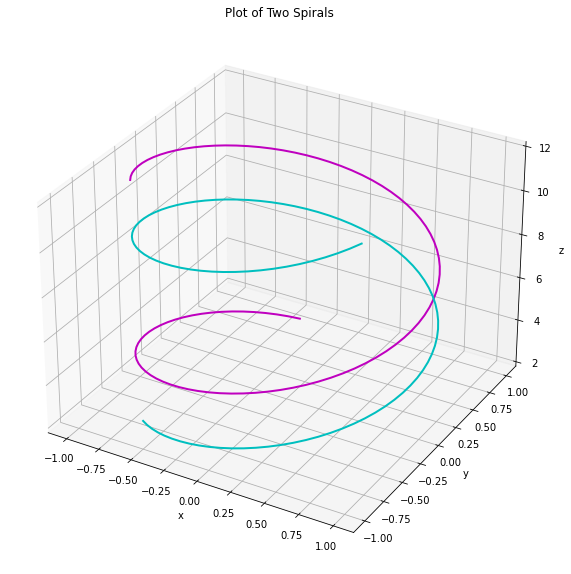

In [10]:
# Continuous Lambda Functions of 2 Curves
parametrized_curve_c = lambda x: np.transpose(np.stack((np.cos(2 + 8 * x), np.sin(2 + 8 * x), 2 + 10 * x)))
parametrized_curve_d = lambda x: np.transpose(np.stack((np.cos(4 + 8 * x), np.sin(4 + 8 * x), 2 + 10 * x)))

n_sampling_points = 100
sampling_points = np.linspace(0.0, 1, n_sampling_points + 1)

dc_viz_spiral =  DiscreteCurveViz(curves_r3, [parametrized_curve_c,parametrized_curve_d], [sampling_points,sampling_points])

# Plot Our Curves
linestyles = ['m', 'c']
axis_labels = ['x','y','z']
title = 'Plot of Two Spirals'
dc_viz_spiral.plot_3Dcurves(linestyles, axis_labels, title)

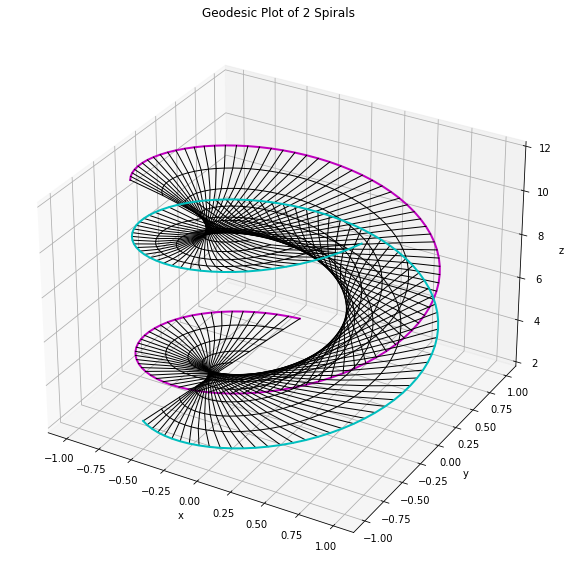

<Figure size 720x720 with 0 Axes>

In [11]:
# Plot the Geodesic Between Spirals as a Net
n_times = 10
index_c = 0
index_d = 1
linestyles = ['m', '-k', 'c']
title = "Geodesic Plot of 2 Spirals"
view_init = None
dc_viz_spiral.plot_geodesic_net(n_times, index_c, index_d, linestyles, axis_labels, title, view_init)

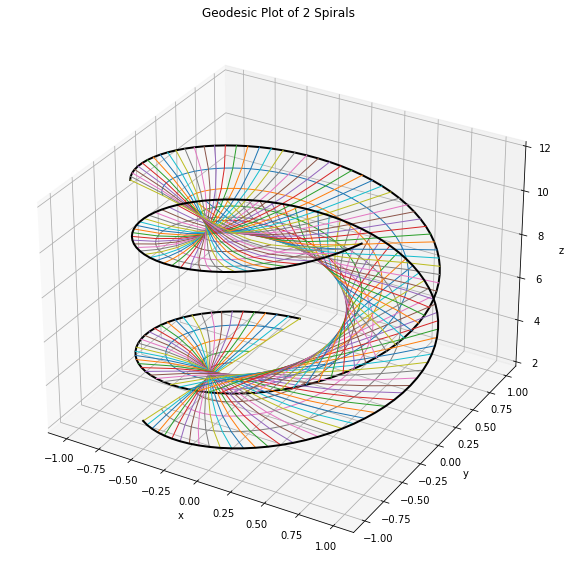

<Figure size 720x720 with 0 Axes>

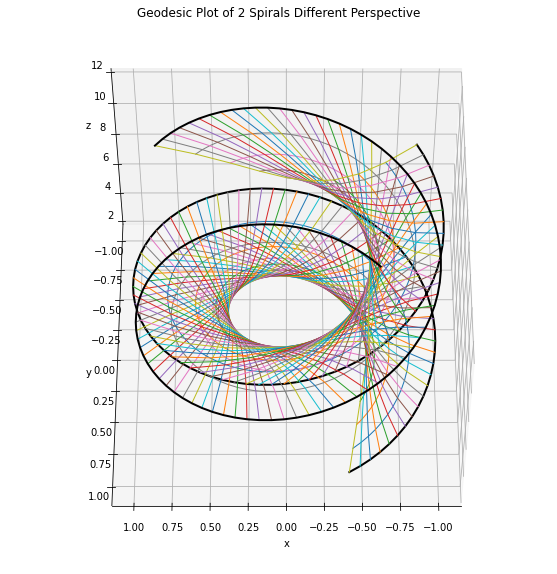

<Figure size 720x720 with 0 Axes>

In [12]:
# Changing Plot Perspective
n_times = 10
linestyles = ['k', '-', 'k']
title = "Geodesic Plot of 2 Spirals"
view_init = None
dc_viz_spiral.plot_geodesic_net(n_times, index_a, index_b, linestyles, axis_labels, title, view_init)

title = "Geodesic Plot of 2 Spirals Different Perspective"
view_init = (55,90)
dc_viz_spiral.plot_geodesic_net(n_times, index_a, index_b, linestyles, axis_labels, title, view_init)

### Mapping of Sampling Points (Parallel Transport)

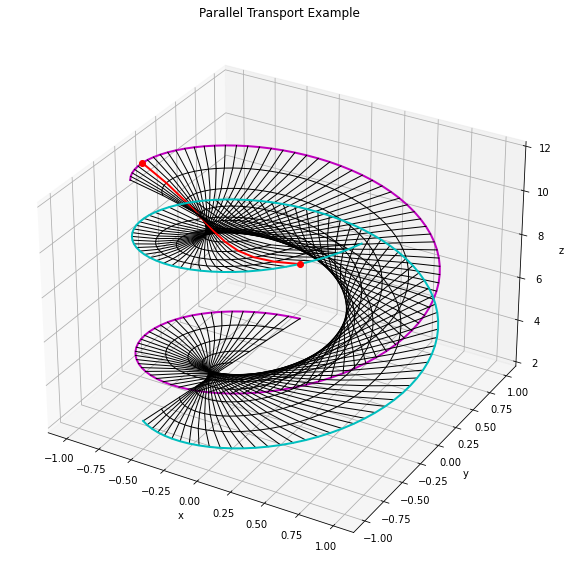

<Figure size 720x720 with 0 Axes>

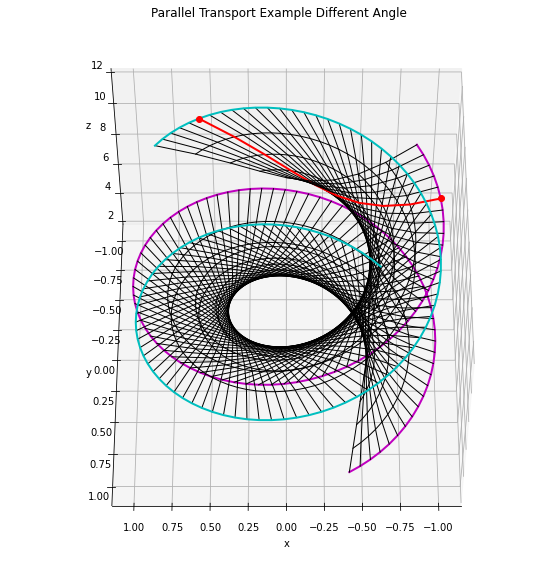

<Figure size 720x720 with 0 Axes>

In [13]:
linestyles = ['m', '-k', 'c']
title = "Parallel Transport Example"
sample_point_index = 95
view_init = None
dc_viz_spiral.plot_parallel_transport(n_times, sample_point_index ,index_a, index_b, linestyles, axis_labels, title, view_init)

title = "Parallel Transport Example Different Angle"
view_init = (55,90)
dc_viz_spiral.plot_parallel_transport(n_times, sample_point_index ,index_a, index_b, linestyles, axis_labels, title, view_init)


### Conclusion
Discrete curves are essential for shape analytics, as they allow us to turn real world data into sparer representations that speed up computational operations. The geodesic between curves is a notion of distance that maps each sampled point along the first curve to be mapped the the second curve.

This one to one correspondance is the path that curve 1 would follow if it wanted to properly "morph" into curve 2, aka the notion of parallel transport from one discrete curve to another.

This morphing along the geodesic is at the core of the inherent "elastic metric" every discrete curve has within a predefined space

## References


- https://www.cs.jhu.edu/~misha/Fall09/1-curves.pdf

- https://github.com/geomstats/geomstats/blob/master/geomstats/geometry/discrete_curves.py

- https://geomstats.github.io/notebooks/10_practical_methods__shape_analysis.html

- https://www-sop.inria.fr/ariana/Projets/Shapes/ThirdYearReport/SrivastavaKlassenJoshiJermynTPAMI10UNDERREVIEW.pdf

- http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.138.2219&rep=rep1&type=pdf

